In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model

In [2]:
# Import dataset
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# Take the variables that will be used
df = df[['price', 'sqft_living']]
df = df.astype(int)
df.head()

,price,sqft_living
0,313000,1340
1,2384000,3650
2,342000,1930
3,420000,2000
4,550000,1940


In [4]:
# Drop the data with price value = 0
df.drop(index = df[df['price'] == 0].index, inplace = True)

In [5]:
# Shows the basic statistics of the data
df.describe()

,price,sqft_living
count,4.551000e+03,4551.000000
mean,5.579059e+05,2132.372226
std,5.639299e+05,955.949708
min,7.800000e+03,370.000000
25%,3.262640e+05,1460.000000
50%,4.650000e+05,1970.000000
75%,6.575000e+05,2610.000000
max,2.659000e+07,13540.000000


<Figure size 864x432 with 0 Axes>

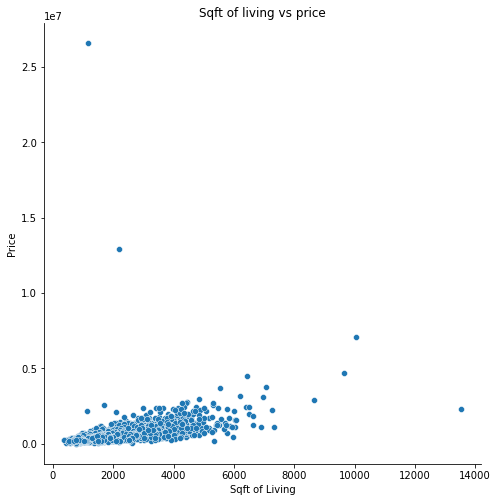

In [6]:
# Shows the plot sqft_living vs price
plt.figure(figsize = (12, 6))
sns.pairplot(df, x_vars = ['sqft_living'], y_vars = ['price'], height = 7, kind = 'scatter')
plt.xlabel('Sqft of Living')
plt.ylabel('Price')
plt.title('Sqft of living vs price')
plt.show()

In [7]:
# Remove the outliers data
df.drop(index = df[df['price'] > 10000000].index, inplace = True)
df.drop(index = df[df['sqft_living'] > 12000].index, inplace = True)

<Figure size 864x432 with 0 Axes>

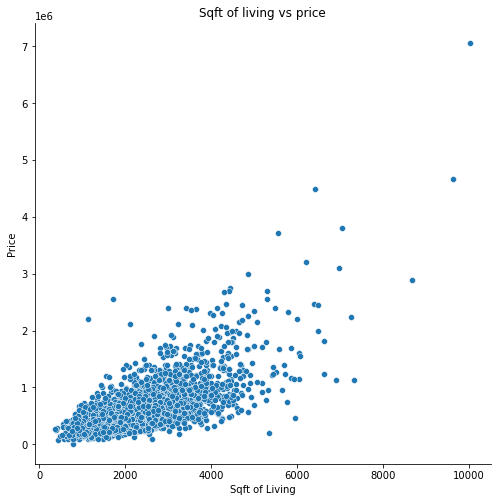

In [8]:
# Shows the plot sqft_living vs price
plt.figure(figsize = (12, 6))
sns.pairplot(df, x_vars = ['sqft_living'], y_vars = ['price'], height = 7, kind = 'scatter')
plt.xlabel('Sqft of Living')
plt.ylabel('Price')
plt.title('Sqft of living vs price')
plt.show()

In [9]:
# Set X and y
X = df.drop(columns = ['price'])
y = df['price']

In [10]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [11]:
# Predict price of a home with living area = 3300 sqr ft
prices = reg.predict([[3300]])
print(prices[0])

867823.664659319


In [12]:
# price = theta0 + theta1 * sqft_living
theta0 = reg.intercept_
theta1 = reg.coef_

price = theta0 + theta1 * 3300

print(price)

[867823.66465932]


In [13]:
# Generate CSV file with list of home price predictions
df2 = pd.read_csv("areas.csv")
df2.head(3)

prices2 = reg.predict(df2)

df2['prices'] = prices2

In [14]:
# Save the predicted house prices
df2.to_csv("prediction.csv")

## Exercise

Using the 'canada_per_capita_income.csv' file, build a regression model and predict the per capita income fo canadian citizens in year 2020.